<h1>Мини-проект </h1>

1 - 2. Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_1_lesson_7.csv')

In [3]:
df.shape

(6, 3)

In [4]:
df

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


In [5]:
df["date"] = pd.to_datetime(df.date)

In [6]:
df

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


In [7]:
df = df.pivot(index = "date", columns = "user_type", values = "visits").reset_index()

In [8]:
df

user_type,date,People,Robots
0,2020-06-15,417.0,177.0
1,2020-06-16,472.0,91.0
2,2020-06-17,475.0,138.0


In [9]:
sns.set(
    font_scale = 2,
    style       = "whitegrid",
    rc          = {"figure.figsize" : (20, 7)}    
)

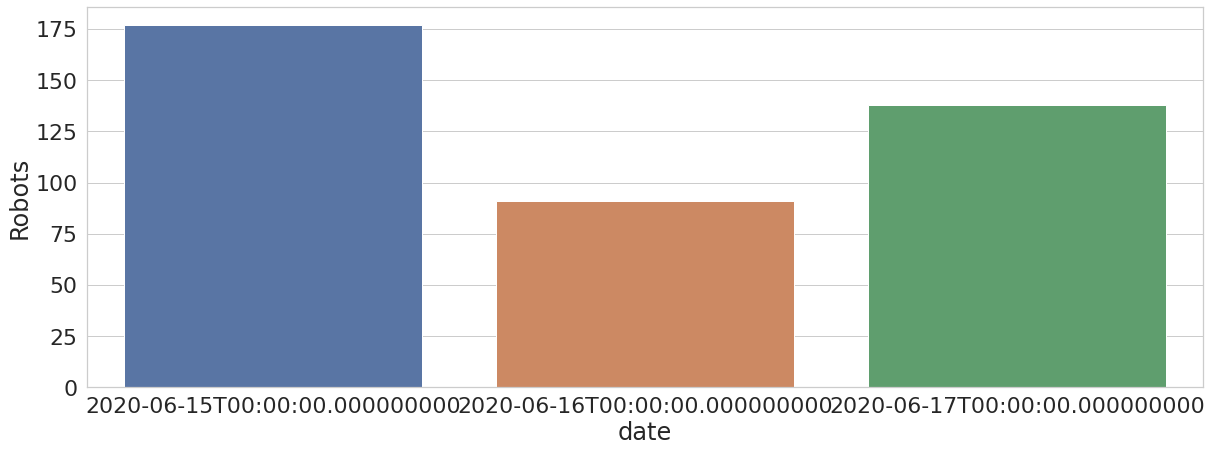

In [10]:
ax = sns.barplot(x = df.date, y = df.Robots, label = "robots")

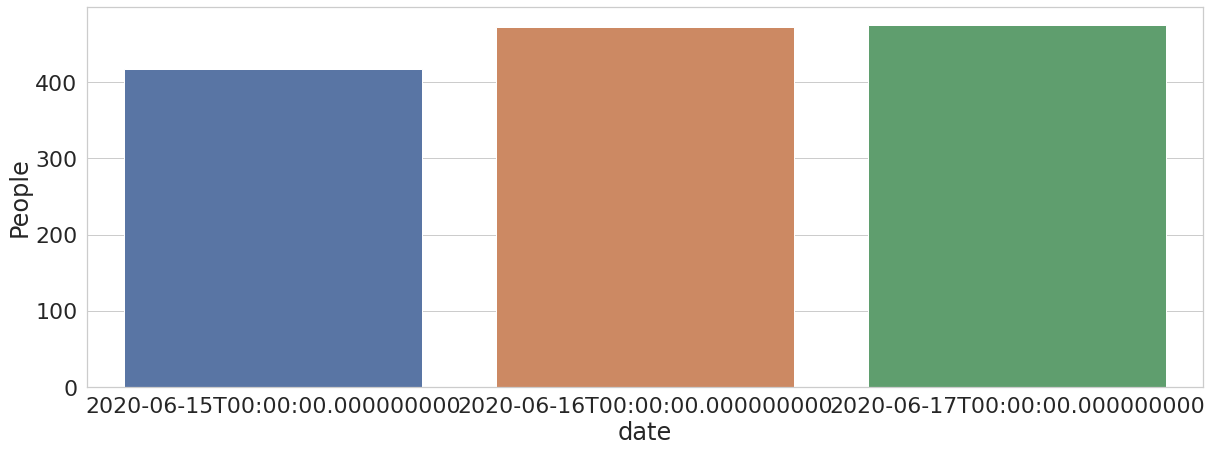

In [11]:
ax = sns.barplot(x = df.date, y = df.People, label = "people")

3. Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome.

In [12]:
df = pd.read_csv("https://stepik.org/media/attachments/lesson/361618/step_2_lesson_7.csv")

In [13]:
df

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [14]:
(354/df.visits.sum()  * 100).round()

60.0

4. Давайте выясним, с какого браузера приходит <b> больше </b> всего ботов. Посмотрите на данные и определите, у какого браузера самая <b> большая доля </b> посещений сайта ботами от общего числа посещений в этом браузере?  

В качестве ответа укажите название браузера.

In [15]:
df = pd.read_csv("https://stepik.org/media/attachments/lesson/361618/step_3_lesson_7.csv")

In [16]:
df

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [23]:
df1 = df.groupby("browser", as_index = False) \
  .agg({"visits" : "sum"}) \
  .sort_values("visits", ascending = False)

In [24]:
df2 = df.query("user_type == 'Robots'") \
  .groupby("browser", as_index = False) \
  .agg({"visits" : "sum"}) \
  .sort_values("visits", ascending = False)

In [26]:
total_df = df1.merge(df2, on = "browser")

In [27]:
total_df

,browser,visits_x,visits_y
0,Google Chrome,354.0,104.0
1,Firefox,58.0,31.0
2,Yandex Browser,54.0,7.0
3,Safari,41.0,22.0
4,Mobile Safari,16.0,1.0
5,Opera,16.0,5.0
6,Samsung Internet,9.0,1.0
7,Edge,5.0,1.0
8,UCWEB,4.0,4.0
9,Chromium,2.0,1.0


In [29]:
total_df["share of bot visits"] = total_df.visits_y / total_df.visits_x

In [31]:
total_df.sort_values("share of bot visits", ascending = False)

,browser,visits_x,visits_y,share of bot visits
8,UCWEB,4.0,4.0,1.000000
3,Safari,41.0,22.0,0.536585
1,Firefox,58.0,31.0,0.534483
9,Chromium,2.0,1.0,0.500000
5,Opera,16.0,5.0,0.312500
0,Google Chrome,354.0,104.0,0.293785
7,Edge,5.0,1.0,0.200000
2,Yandex Browser,54.0,7.0,0.129630
6,Samsung Internet,9.0,1.0,0.111111
4,Mobile Safari,16.0,1.0,0.062500


5. Выгрузите данные, содержащие информацию о дне, типе пользователя, браузере. Создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.  

В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.  

Hint: обратите внимание, здесь вам нужно найти долю заходов конкретных типов пользователей с конкретного браузера от вообще всех-всех заходов на сайт за этот день.

In [32]:
df = pd.read_csv("https://stepik.org/media/attachments/lesson/361618/step_4_lesson_7.csv")

In [36]:
grouped_df = df.groupby(["browser", "user_type"], as_index = False) \
  .agg({"visits" : "sum"})

In [37]:
grouped_df

,browser,user_type,visits
0,Android Browser,People,1.0
1,Chrome Mobile,People,31.0
2,Chromium,People,1.0
3,Chromium,Robots,1.0
4,CocCoc,People,1.0
5,Edge,People,4.0
6,Edge,Robots,1.0
7,Firefox,People,27.0
8,Firefox,Robots,31.0
9,Google Chrome,People,250.0


In [38]:
grouped_df["percentage_of_visitings"] = (grouped_df.visits / grouped_df.visits.sum() * 100).round(1)

In [39]:
grouped_df

,browser,user_type,visits,percentage_of_visitings
0,Android Browser,People,1.0,0.2
1,Chrome Mobile,People,31.0,5.2
2,Chromium,People,1.0,0.2
3,Chromium,Robots,1.0,0.2
4,CocCoc,People,1.0,0.2
5,Edge,People,4.0,0.7
6,Edge,Robots,1.0,0.2
7,Firefox,People,27.0,4.5
8,Firefox,Robots,31.0,5.2
9,Google Chrome,People,250.0,42.1


6. При помощи библиотеки <b>gspread</b> отправьте данные из предыдущего шага в Google SpreadSheet. Далее отправьте ссылку на получившийся файл в Google SpreadSheet (не забудьте открыть доступ по ссылке, это можно сделать вручную, когда данные уже зальются в таблицу) при помощи VK API себе в личку ВКонтакте. 

In [40]:
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials

In [41]:
scope = ["https://spreadsheets.google.com/feeds",
         "https://www.googleapis.com/auth/drive"] # набор прав питоновскому приложению входить в гугл документы и на гугл диск
# Autorisation
credentials = ServiceAccountCredentials.from_json_keyfile_name("/home/jupyter-r-ivanov-20/lesson_7/test-340115-f239fcd0056e.json", scope)
gs = gspread.authorize(credentials)

my_mail = "I.Roman1402afuran12@gmail.com"
# Create empty table
table_name = 'Percentage of visitings'
sheet = gs.create(table_name)
spreadsheet_url = "https://docs.google.com/spreadsheets/d/%s" % sheet.id
# Make it visible to other guys
sheet.share(my_mail, perm_type='user', role='writer')

In [42]:
# Looks like spreadsheet should be already present at the dist (so, run code in create table section)
sheet = 'Данные'
d2g.upload(grouped_df, table_name, sheet, credentials=credentials, row_names=True)

<Worksheet 'Данные' id:179502122>

In [43]:
spreadsheet_url

'https://docs.google.com/spreadsheets/d/15UdHhaDChF7F1NnV494yIa2MahDc2T0xrObOyfMh3uY'

In [44]:
import datetime
import vk_api
import os
import requests
import json 

In [45]:
token = "dd520097b6cdfa7d9f8e7052b2248fc8a5c0807ab2c946a68013fdd84fadb203b277dfb7cb684d5e1f14f"

In [46]:
vk_session = vk_api.VkApi(token = token) # подключение к vk из питона
vk = vk_session.get_api()

In [47]:
vk.messages.send(
    chat_id = 1,
    random_id = 1, 
    message = spreadsheet_url)

0

7. Другой аналитик уже агрегировал часть данных из метрики. Вам нужно объединить усилия, чтобы получить финальный отчет. Прочитайте дополнительные данные из Google SpreadSheet, объедините вашу таблицу из предыдущего шага с таблицей аналитика и посчитайте количество визитов на человека (отношение <b>visits</b> к <b>users</b>) в разрезе по браузеру и значениям Robots/People.

В ответе укажите, сколько визитов на уникального пользователя совершается ботами с браузера Google Chrome (округлите до целого)

Вот так можно прочитать данные другого аналитика:
```Python
from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df = pd.read_csv(BytesIO(data))
```

In [48]:
from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df = pd.read_csv(BytesIO(data))

In [52]:
full_data = grouped_df.merge(df, on = ["browser", "user_type"])

In [53]:
full_data

,browser,user_type,visits,percentage_of_visitings,date,users
0,Android Browser,People,1.0,0.2,2020-06-15,1.0
1,Chrome Mobile,People,31.0,5.2,2020-06-15,30.0
2,Chromium,People,1.0,0.2,2020-06-15,1.0
3,Chromium,Robots,1.0,0.2,2020-06-15,1.0
4,CocCoc,People,1.0,0.2,2020-06-15,1.0
5,Edge,People,4.0,0.7,2020-06-15,4.0
6,Edge,Robots,1.0,0.2,2020-06-15,1.0
7,Firefox,People,27.0,4.5,2020-06-15,26.0
8,Firefox,Robots,31.0,5.2,2020-06-15,29.0
9,Google Chrome,People,250.0,42.1,2020-06-15,240.0


In [54]:
full_data["visits by users"] = full_data["users"] / full_data["visits"]

In [56]:
full_data

,browser,user_type,visits,percentage_of_visitings,date,users,visits by users
0,Android Browser,People,1.0,0.2,2020-06-15,1.0,1.000000
1,Chrome Mobile,People,31.0,5.2,2020-06-15,30.0,0.967742
2,Chromium,People,1.0,0.2,2020-06-15,1.0,1.000000
3,Chromium,Robots,1.0,0.2,2020-06-15,1.0,1.000000
4,CocCoc,People,1.0,0.2,2020-06-15,1.0,1.000000
5,Edge,People,4.0,0.7,2020-06-15,4.0,1.000000
6,Edge,Robots,1.0,0.2,2020-06-15,1.0,1.000000
7,Firefox,People,27.0,4.5,2020-06-15,26.0,0.962963
8,Firefox,Robots,31.0,5.2,2020-06-15,29.0,0.935484
9,Google Chrome,People,250.0,42.1,2020-06-15,240.0,0.960000
